In [108]:
%matplotlib inline
from pandas import *
set_option('display.notebook_repr_html',True) # HTML output
set_option('display.max_rows',10)
import matplotlib.pyplot as plt
import numpy as np

In [10]:
names = read_csv('data/baby-names2.csv')

   year     name      prop  sex soundex
0  1880     John  0.081541  boy    J500
1  1880  William  0.080511  boy    W450
2  1880    James  0.050057  boy    J520
3  1880  Charles  0.045167  boy    C642
4  1880   George  0.043292  boy    G620

In [23]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [17]:
names[names.year == 1880].tail()

,year,name,prop,sex,soundex
129995,1880,Emaline,0.000041,girl,E545
129996,1880,Ester,0.000041,girl,E236
129997,1880,Eulah,0.000041,girl,E400
129998,1880,Eulalie,0.000041,girl,E440
129999,1880,Euna,0.000041,girl,E500


In [26]:
boys = names[names.sex == 'boy']
girls = names[names.sex == 'girl']

In [19]:
boys.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [24]:
boys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129000 entries, 0 to 128999
Data columns (total 5 columns):
year       129000 non-null int64
name       129000 non-null object
prop       129000 non-null float64
sex        129000 non-null object
soundex    129000 non-null object
dtypes: float64(1), int64(1), object(3)

In [27]:
girls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129000 entries, 129000 to 257999
Data columns (total 5 columns):
year       129000 non-null int64
name       129000 non-null object
prop       129000 non-null float64
sex        129000 non-null object
soundex    129000 non-null object
dtypes: float64(1), int64(1), object(3)

In [39]:
boys.groupby('year').size() # Number of records in each group

year
1880    1000
1881    1000
1882    1000
...
2006    1000
2007    1000
2008    1000
Length: 129, dtype: int64

In [44]:
groups = names.groupby(['year','sex']).size()
print(groups)
print(type(groups)) # Even the result is a series with multi-indexing

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
...
2007  girl    1000
2008  boy     1000
      girl    1000
Length: 258, dtype: int64
<class 'pandas.core.series.Series'>


In [45]:
# Since multi-indexed, we can check the count of specific year/sex
print(groups.ix[2000])

sex
boy     1000
girl    1000
dtype: int64


In [48]:
print(groups.ix[2000]['boy']) # 1000 boys in year 2000

1000


##Let's find the most popular names for boys

In [51]:
boys[boys.year == 2000]
# the data seems to be already sorted by proportion

,year,name,prop,sex,soundex
120000,2000,Jacob,0.016514,boy,J210
120001,2000,Michael,0.015346,boy,M240
120002,2000,Matthew,0.013695,boy,M300
120003,2000,Joshua,0.013194,boy,J200
120004,2000,Christopher,0.011990,boy,C623
...,...,...,...,...,...
120995,2000,Dayne,0.000071,boy,D500
120996,2000,Francesco,0.000071,boy,F652
120997,2000,Isaak,0.000071,boy,I220
120998,2000,Lionel,0.000071,boy,L540


In [53]:
# Ignoring that, let's find the top boy name for 2000
max_bname_idx = boys[boys.year == 2000].prop.idxmax()
boys.ix[max_bname_idx]

year           2000
name          Jacob
prop       0.016514
sex             boy
soundex        J210
Name: 120000, dtype: object

In [64]:
#Let's find this for all years
def top_bname(group):
    return group.ix[group.prop.idxmax()]
top_bname(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [67]:
result = boys.groupby('year').apply(top_bname)
print(result)

      year   name      prop  sex soundex
year                                    
1880  1880   John  0.081541  boy    J500
1881  1881   John  0.080975  boy    J500
1882  1882   John  0.078314  boy    J500
1883  1883   John  0.079066  boy    J500
1884  1884   John  0.076476  boy    J500
...    ...    ...       ...  ...     ...
2004  2004  Jacob  0.013196  boy    J210
2005  2005  Jacob  0.012148  boy    J210
2006  2006  Jacob  0.011331  boy    J210
2007  2007  Jacob  0.010948  boy    J210
2008  2008  Jacob  0.010355  boy    J210

[129 rows x 5 columns]


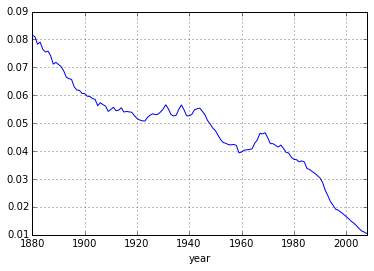

In [70]:
result.prop.plot()  # proportion of max name over the years

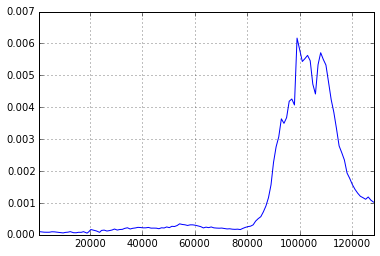

In [76]:
boys[boys.name=='Travis'].prop.plot()

In [77]:
# Searching for each name like this would take a long time. 
# So create an index based on year and name
idf = boys.set_index(['name','year'])
idf

,,prop,sex,soundex
name,year,,,
John,1880,0.081541,boy,J500
William,1880,0.080511,boy,W450
James,1880,0.050057,boy,J520
Charles,1880,0.045167,boy,C642
George,1880,0.043292,boy,G620
...,...,...,...,...
Kolten,2008,0.000090,boy,K435
Damari,2008,0.000089,boy,D560
Hugh,2008,0.000089,boy,H200


In [78]:
idf.ix['Travis']

,prop,sex,soundex
year,,,
1880,0.000101,boy,T612
1882,0.000082,boy,T612
1883,0.000080,boy,T612
1884,0.000081,boy,T612
1885,0.000095,boy,T612
...,...,...,...
2004,0.001164,boy,T612
2005,0.001114,boy,T612
2006,0.001186,boy,T612


In [80]:
%timeit boys[boys.name == 'Travis']

100 loops, best of 3: 8 ms per loop


In [81]:
%timeit idf.ix['Travis']

1000 loops, best of 3: 571 µs per loop


As we can see, indexing improves the performance tremendously

prop       0.005808
sex             boy
soundex        T612
Name: (Travis, 1980), dtype: object


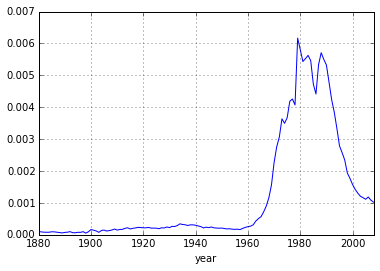

In [84]:
print(idf.ix['Travis',1980])
idf.ix['Travis'].prop.plot()

In [87]:
# to get name-wise prop aggregation
namewise_prop = boys.groupby('name')['prop']
namewise_prop.mean()

name
Aaden    0.000442
Aarav    0.000101
Aaron    0.002266
...
Zigmund    0.000052
Zion       0.000490
Zollie     0.000060
Name: prop, Length: 3437, dtype: float64

In [92]:
namewise_prop.mean().order()   # most famous boy names on average

name
Kennard    0.000027
Danniel    0.000027
Deryl      0.000028
...
William    0.034182
James      0.035465
John       0.041082
Name: prop, Length: 3437, dtype: float64

In [94]:
namewise_prop.mean().order().tail()

name
Charles    0.019521
Robert     0.029625
William    0.034182
James      0.035465
John       0.041082
Name: prop, dtype: float64

In [96]:
boys['prop'].describe()  # Useful info about the column

count    129000.000000
mean          0.000916
std           0.003441
min           0.000026
25%           0.000071
50%           0.000142
75%           0.000453
max           0.081541
dtype: float64

In [103]:
summary = boys.groupby('name')['prop'].describe()

In [101]:
print(summary.ix['Aaden'])
print(summary.ix['John'])

count    1.000000
mean     0.000442
std           NaN
min      0.000442
25%      0.000442
50%      0.000442
75%      0.000442
max      0.000442
dtype: float64
count    129.000000
mean       0.041082
std        0.020328
min        0.006102
25%        0.020822
50%        0.045037
75%        0.054678
max        0.081541
dtype: float64


In [112]:
summary[:10]

name        
Aaden  count    1.000000
       mean     0.000442
       std           NaN
       min      0.000442
       25%      0.000442
       50%      0.000442
       75%      0.000442
       max      0.000442
Aarav  count    1.000000
       mean     0.000101
dtype: float64

In [115]:
# Sorting based on an index
df = boys[boys.year == 2008].sort_index(by='prop',ascending=False)
df

,year,name,prop,sex,soundex
128000,2008,Jacob,0.010355,boy,J210
128001,2008,Michael,0.009437,boy,M240
128002,2008,Ethan,0.009301,boy,E350
128003,2008,Joshua,0.008799,boy,J200
128004,2008,Daniel,0.008702,boy,D540
...,...,...,...,...,...
128995,2008,Kolten,0.000090,boy,K435
128996,2008,Damari,0.000089,boy,D560
128997,2008,Hugh,0.000089,boy,H200
128998,2008,Jensen,0.000089,boy,J525


In [117]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
...
128997    0.000089
128998    0.000089
128999    0.000089
Name: prop, Length: 1000, dtype: float64

In [126]:
df.prop.cumsum()[-1:]  # Top 1000 names represent ~80% of total

128999    0.795414
Name: prop, dtype: float64

In [129]:
# How many top names constitute 50% of total?
# df.prop.cumsum().searchsorted(0.5) will not work because Series now
# subclasses NDFrame. To convert to numpy array, use values
df.prop.cumsum().values.searchsorted(0.5)

127

In [133]:
# To verify that the top 127 names make up 50%
df.prop.cumsum()[:128]

128000    0.010355
128001    0.019792
128002    0.029093
...
128125    0.497718
128126    0.499243
128127    0.500748
Name: prop, Length: 128, dtype: float64

In [139]:
bprop1880 = boys[boys.year == 1880].sort_index(by='prop',ascending=False)
bprop1880.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [142]:
# bprop1880.cumsum() would give string concatenation for string fields, resulting in super long strings.
bprop1880.prop.cumsum()

0    0.081541
1    0.162052
2    0.212109
...
934    0.930662
933    0.930704
999    0.930746
Name: prop, Length: 1000, dtype: float64

In [145]:
bprop1880.prop.cumsum().values.searchsorted(0.5)

15

Top 15 names already covered 50% of the entire distribution in 1880
Let's see how this changed over the years as people got creative

In [152]:
def get_quantile_count(group, quantile=0.5):
    sorted = group.sort_index(by='prop',ascending=False)
    return sorted.prop.cumsum().values.searchsorted(quantile)
#get_quantile_count(boys[boys.year==1880])
#get_quantile_count(boys[boys.year==2008])
boys.groupby('year').apply(get_quantile_count)

year
1880    15
1881    15
1882    17
...
2006    115
2007    120
2008    127
Length: 129, dtype: int64